In [2]:
from google.colab import drive

drive.mount('/content/drive')

!ls 'drive/My Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 bpm.behnejadi.rar
'Colab Notebooks'
'Copy of data.aug.rar'
 data.aug
 data.aug.rar
 data.mobilenet
 data.resnet50
 data.row
 data.row.battah
 dataset
 data.v
 data.vgg16
 data.xception
 IEEE_Iran_Section_Certificate_AIDLinAutoRobotics__Fateme_behnejadi__125598.pdf
 simplenet.accurac.aut.h5
 simplenet.date_time.h5
 simplenet.h5
 thesis


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam,SGD
from keras.datasets import cifar10
from keras.models import Sequential
from keras.models import Model, model_from_json
from keras.layers import Dense, Activation, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten ,Dropout
import tensorflow as tf
from keras.regularizers import l2
from keras import regularizers, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import glorot_normal, RandomNormal, Zeros
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc ,accuracy_score,precision_score,recall_score,f1_score,accuracy_score
import datetime, os

In [4]:
#loading data
dataset = np.load('/content/drive/My Drive/data.row.battah/ASD_process.npz') #Dataset ready in numpy array (removing background, resizing, and transforming into grayscale)
X = dataset['X']
y = dataset['y']

print(X.shape)
print(y.shape)

(3103, 32, 32, 1)
(3103, 1)


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
mean = np.mean(X_train, axis=(0, 1, 2,3))
std = np.std(X_train, axis=(0, 1, 2,3))
X_train = (X_train - mean) / (std+1e-7)

X_test =(X_test-mean) / (std+1e-7)

In [7]:
X_test, X_validate, Y_test, Y_validate = train_test_split(X_test, Y_test, test_size=0.75,random_state=42)

In [8]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_validate.shape)
print(Y_validate.shape)

(2172, 32, 32, 1)
(2172, 1)
(232, 32, 32, 1)
(232, 1)
(699, 32, 32, 1)
(699, 1)


In [9]:
num_classes=1

In [10]:
def create_cnn():
    model = Sequential()
    # Conv Block 1
    model.add(Conv2D(64, (3, 3), padding='same' , strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal() , input_shape=X_train.shape[1:]))
    model.add(BatchNormalization(momentum=0.05,trainable=True, epsilon=1e-05))# affine=True, track_running_stats=True
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(128, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(128, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(Conv2D(128, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))# padding=0, dilation=(1, 1), ceil_mode=False)
    model.add(Dropout(0.1))          


    # Conv Block 2
    model.add(Conv2D(128, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(128, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(256, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))# padding=0, dilation=(1, 1), ceil_mode=False)
    model.add(Dropout(0.1))


    # Conv Block 3
    model.add(Conv2D(256, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(256, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))# padding=0, dilation=(1, 1), ceil_mode=False)
    model.add(Dropout(0.1))

    # Conv Block 4
    model.add(Conv2D(512, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))# padding=0, dilation=(1, 1), ceil_mode=False)
    model.add(Dropout(0.1))

    # Conv Block 5
    model.add(Conv2D(2048, (1, 1), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(256, (1, 1), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))# padding=0, dilation=(1, 1), ceil_mode=False)
    model.add(Dropout(0.1))


    # Conv Block 6
    model.add(Conv2D(256, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)


    # Classifier
    model.add(Flatten())
    model.add(Dense(num_classes, activation='sigmoid'))

    return model

model = create_cnn()
#model.summary()

In [11]:
BATCH_SIZE =64
STEPS_PER_EPOCH =len(X_train)//BATCH_SIZE 

step = tf.Variable(0, trainable=False)
boundaries = [30*STEPS_PER_EPOCH,60*STEPS_PER_EPOCH,
              80*STEPS_PER_EPOCH]
values = [0.1, 0.01 , 0.001, 0.0001]
learning_rate_fn = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values)

In [12]:
opt = SGD(learning_rate=learning_rate_fn(step))#,momentum=0.9,decay=0.01,nesterov=False
#opt = Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.99,epsilon=0.1,amsgrad=False,name="Adam",)

In [13]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [15]:
history =model.fit(X_train,Y_train, batch_size=64,
                   steps_per_epoch=len(X_train) //64,epochs=1,
                   validation_data=(X_validate, Y_validate),
              shuffle=True,callbacks=[tensorboard_callback])

33/33 [==============================] - 218s 7s/step - loss: 14.7760 - accuracy: 0.5821 - val_loss: 14.0360 - val_accuracy: 0.6237


In [16]:
model.evaluate(X_test, Y_test, batch_size=64)

4/4 [==============================] - 5s 1s/step - loss: 14.0044 - accuracy: 0.5991


[14.004356384277344, 0.5991379022598267]

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs

In [18]:
from datetime import datetime
now = datetime.now() 
date_time = now.strftime("%m/%d/%Y, %H-%M-%S")

print("date and time:",date_time)

date and time: 01/05/2021, 21-13-40


In [19]:
model.save('/content/drive/My Drive/simplenet.date_time.h5')
                 
#model= keras.models.load_model('simplenet.accurac.aut.h5')

In [20]:
import pickle 
  
# Save the trained model as a pickle string. 
save_train = pickle.dumps(X_train) 

# Load the pickled model 
#model_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
#model_from_pickle.predict(X_test) 

In [ ]:
from scipy import interp
tprs = []
aucs = []

recall =[]
precision = []
accuracy =[]
mean_fpr = np.linspace(0, 1, 100)

hists_CNN = []

pred = model.predict(X_validate).ravel()

#Calculating Recall and precision
recall.append( recall_score(Y_validate, pred.round()) )
precision.append( precision_score(Y_validate, pred.round()) )
accuracy.append(accuracy_score(Y_validate, pred.round()))

#ROC AUC
fpr, tpr, thresholds = roc_curve(Y_validate, pred)
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
print(roc_auc)
aucs.append(roc_auc)
hists_CNN.append(history)

print("Avg AUC:", np.mean(aucs))
print("Avg accuracy:", np.mean(accuracy))
print("Avg Recall:", np.mean(recall))
print("Avg Precision:", np.mean(precision))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


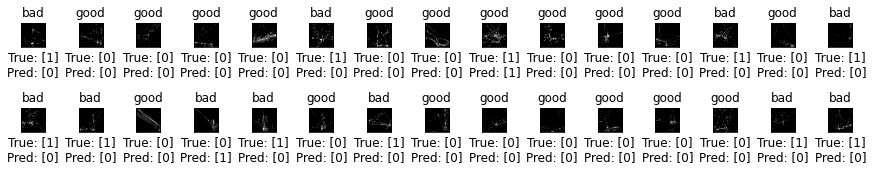

In [27]:
def visualize(X_validate, labels, rows=20,cols=3):
    # figure shekl kolie mast. anazash ham 
    # be sorate w,h has 
    fig = plt.figure(figsize=(cols , rows))
    # baraye tanzim fasele beine subplotha. faalesh konid va natijaro bebind
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.95, hspace=2.5)
    imgs=X_validate
    
    for i in range(imgs.shape[0]):
        preds = model.predict_classes(X_validate)
        # baraye har tasvir ye subplot moshakhas mikonim, migim to ye
        # jadval rowsxcols, to khone i+1 ye ja be man bede 
        ax = fig.add_subplot(rows, cols, i+1, xticks=[], yticks=[])
        # hala migim inja in axo namayesh bede(bezar tosh!)
        # on cmap ham shive namayesh ro moshakahs mikone, chon 
        # tasvir tak  kanale has, migim grayscale, ya siah sefid namyesh bede
        # cmap ro hazf konid bebind chetor mishe shekles
        # squeeze ham baraye ine ke tasvir be forme 32x32x1 has va
        # matplotlib mige chon tak canale has, on yek akharesh niaz nist
        # ba squeeze hazfesh mikonim ke mishe hamoon 32x32 masalan.
        ax.imshow(imgs[i].squeeze(), cmap='gray')
        # inam titlesh! chon string lazem darim az str() estefade kardim
        #ax.set_title(f'l: {labels[i]}/p: {preds[i]}')
        ax.set_xlabel('True: {}\nPred: {}'.format(labels[i],preds[i] ), fontsize=12)
        # hala balaee ro comment konid ziri ro uncomment konid va run begirid
        # hala on fig.subplots_adjust ro faal konid khroji ro bebinid
        ax.set_title('good' if labels[i]==preds[i] else 'bad')
        #str_value = f'label : {labels[i]} / pred: {preds[i]}'  
        
    # in ham mitonid bardarid bebinid chi mishe!
    plt.show()
# inja ham goftam 30 ta tasvir ro neshon bede!
# deghat konid, tedade rows x cols bayad mosavi ya bishtar az
# dade shoma bashe ta khata nagirid. dalilesh ham moshakhase dige
# doroste?
visualize(X_validate[:30], Y_validate[:30], rows=2, cols=15)
# hala in function ro darid , mitonid be tartid, hame aksa ro 
# namayesh bedid. 
# yekseri parameter dige ham hast mesle space, padding o... ke 
# baraye sadegi kar nazashtam. on bala khastid mitonid ono uncomment
# koind va test konid 